# Final Project
### Team Members: Mabel Duran-Sanchez, Stefanee Richardson, Tiffany Teasley, Melodie Vines

In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Read in CSV files
application_df = pd.read_csv('Resources/application_record.csv')
credit_df = pd.read_csv('Resources/credit_record.csv')

## Exploring application_record.csv

In [3]:
#Preview dataframe created from application CSV file
application_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


### Create graph & charts to better visualize applicant data to determine which machine learning model to use 

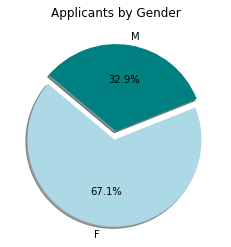

In [4]:
#Applicants by Gender Pie Chart
colors = ['lightblue','teal']
explode = (0.1,0)

pie = application_df['CODE_GENDER'].value_counts()
ax = pie.plot(kind='pie',autopct="%1.1f%%", shadow=True, startangle=140,explode=explode,colors=colors)

ax.set_ylabel("")
plt.title("Applicants by Gender")

plt.savefig("Images/GenderBefore.png")

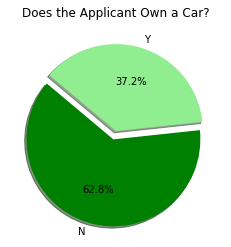

In [5]:
#Applicants by Car Ownership Status (Y/N) Pie Chart
colors = ['green','lightgreen']
explode = (0.1,0)

pie = application_df['FLAG_OWN_CAR'].value_counts()
ax = pie.plot(kind='pie',autopct="%1.1f%%", shadow=True, startangle=140,explode=explode,colors=colors)

ax.set_ylabel("")
plt.title("Does the Applicant Own a Car?")

plt.savefig("Images/CarBefore.png")
plt.show()

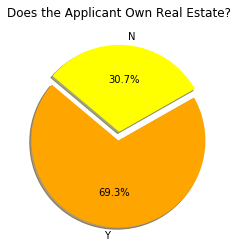

In [6]:
#Applicants by Real Estate Ownership Status (Y/N) Pie Chart
colors = ['orange','yellow']
explode = (0.1,0)

pie = application_df['FLAG_OWN_REALTY'].value_counts()
ax = pie.plot(kind='pie',autopct="%1.1f%%", shadow=True, startangle=140,explode=explode,colors=colors)

ax.set_ylabel("")
plt.title("Does the Applicant Own Real Estate?")

plt.savefig("Images/RealtyBefore.png")
plt.show()

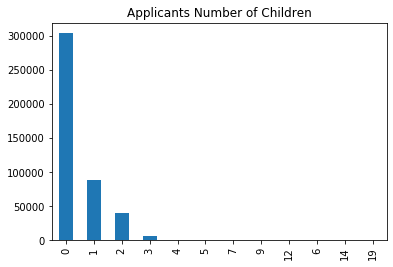

In [7]:
#Applicants by the Number of Children (0, 1, 2, 3+) Bar Chart
pie = application_df['CNT_CHILDREN'].value_counts()
ax = pie.plot(kind='bar')

ax.set_ylabel("")
plt.title("Applicants Number of Children")

plt.savefig("Images/ChildrenCountBefore.png")
plt.show()

#### Applicants with children greater than 3 were very small numbers; therefore did not show well on the bar chart

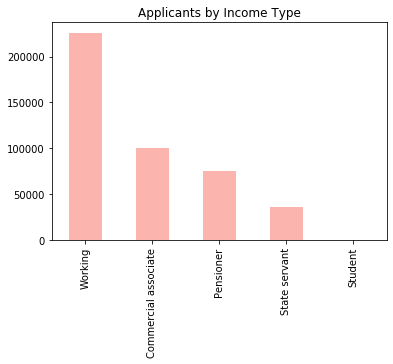

In [8]:
#Applicants by Income Type Bar Chart
pie = application_df['NAME_INCOME_TYPE'].value_counts()
ax = pie.plot(kind='bar', colormap='Pastel1')

ax.set_ylabel("")
plt.title("Applicants by Income Type")

plt.savefig("Images/IncomeTypeBefore.png")
plt.show()

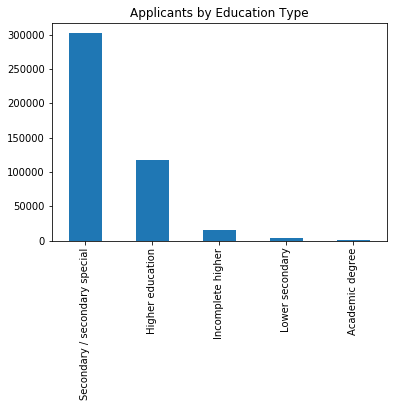

In [9]:
#Applicants by Education Type Bar Chart
pie = application_df['NAME_EDUCATION_TYPE'].value_counts()
ax = pie.plot(kind='bar')

ax.set_ylabel("")
plt.title("Applicants by Education Type")

plt.savefig("Images/EducationTypeBefore.png")
plt.show()

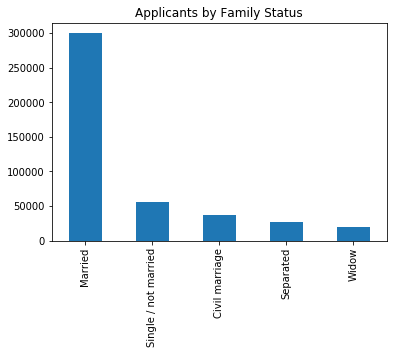

In [10]:
#Applicants by Family Status Bar Chart
pie = application_df['NAME_FAMILY_STATUS'].value_counts()
ax = pie.plot(kind='bar')

ax.set_ylabel("")
plt.title("Applicants by Family Status")

plt.savefig("Images/FamilyBefore.png")
plt.show()

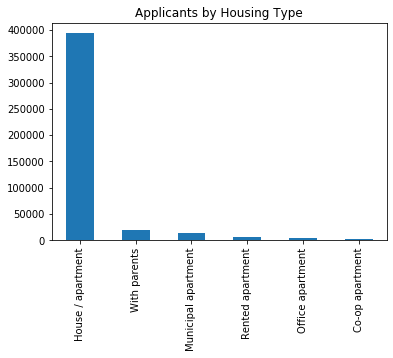

In [11]:
#Applicants by Housing Type Bar Chart
pie = application_df['NAME_HOUSING_TYPE'].value_counts()
ax = pie.plot(kind='bar')

ax.set_ylabel("")
plt.title("Applicants by Housing Type")

plt.savefig("Images/HousingTypeBefore.png")
plt.show()

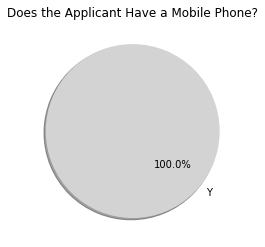

In [12]:
#Applicants who have a mobile phone pie chart
colors = ['lightgrey','darkgrey']
labels = ['Y','N']


pie = application_df['FLAG_MOBIL'].value_counts()
ax = pie.plot(kind='pie',autopct="%1.1f%%", shadow=True, startangle=140,colors=colors, labels=labels)

ax.set_ylabel("")
plt.title("Does the Applicant Have a Mobile Phone?")

plt.savefig("Images/MobilePhoneBefore.png")
plt.show()

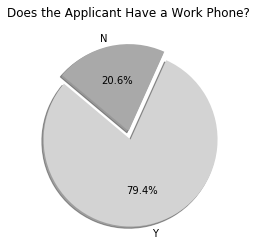

In [13]:
#Applicants who have a work phone pie chart
colors = ['lightgrey','darkgrey']
explode = (0.1,0)
labels = ['Y','N']

pie = application_df['FLAG_WORK_PHONE'].value_counts()
ax = pie.plot(kind='pie',autopct="%1.1f%%", shadow=True, startangle=140,colors=colors,explode=explode, labels=labels)

ax.set_ylabel("")
plt.title("Does the Applicant Have a Work Phone?")

plt.savefig("Images/WorkPhoneBefore.png")
plt.show()

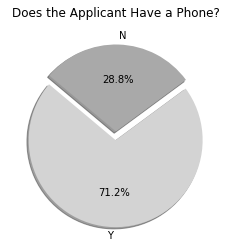

In [14]:
colors = ['lightgrey','darkgrey']
explode = (0.1,0)
labels = ['Y','N']

pie = application_df['FLAG_PHONE'].value_counts()
ax = pie.plot(kind='pie',autopct="%1.1f%%", shadow=True, startangle=140,colors=colors,explode=explode, labels=labels)

ax.set_ylabel("")
plt.title("Does the Applicant Have a Phone?")

plt.savefig("Images/PhoneBefore.png")
plt.show()

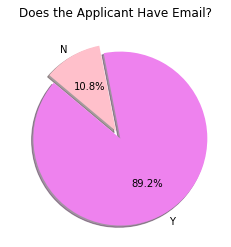

In [15]:
colors = ['violet','pink']
explode = (0.1,0)
labels = ['Y','N']

pie = application_df['FLAG_EMAIL'].value_counts()
ax = pie.plot(kind='pie',autopct="%1.1f%%", shadow=True, startangle=140,colors=colors,explode=explode, labels=labels)

ax.set_ylabel("")
plt.title("Does the Applicant Have Email?")

plt.savefig("Images/EmailBefore.png")
plt.show()

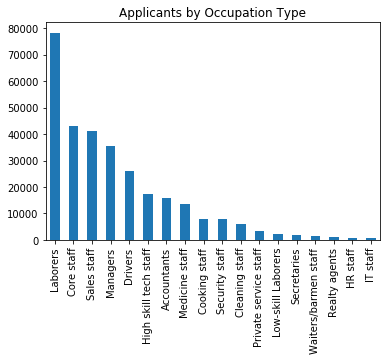

In [16]:
pie = application_df['OCCUPATION_TYPE'].value_counts()
ax = pie.plot(kind='bar')

ax.set_ylabel("")
plt.title("Applicants by Occupation Type")

plt.savefig("Images/OccupationTypeBefore.png")
plt.show()

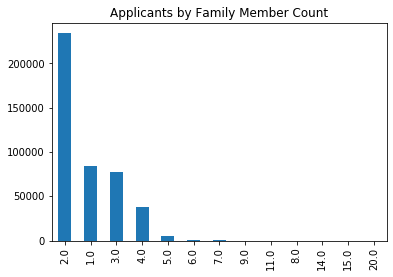

In [17]:
pie = application_df['CNT_FAM_MEMBERS'].value_counts()
ax = pie.plot(kind='bar')

ax.set_ylabel("")
plt.title("Applicants by Family Member Count")

plt.savefig("Images/FamilyMemberBefore.png")
plt.show()

In [18]:
application_df["Gender"] = application_df["CODE_GENDER"]
application_df["OwnsCar"] = application_df["FLAG_OWN_CAR"]
application_df["OwnsRealty"] = application_df["FLAG_OWN_REALTY"]
application_df["EducationType"] = application_df["NAME_EDUCATION_TYPE"]
application_df["FamilyStatus"] = application_df["NAME_FAMILY_STATUS"]
application_df["HousingType"] = application_df["NAME_HOUSING_TYPE"]
application_df["Phone"] = application_df["FLAG_MOBIL"]
application_df["ChildrenCount"] = application_df["CNT_CHILDREN"]
application_df["Income"] = application_df["AMT_INCOME_TOTAL"].astype('int64', copy=False)
application_df["FamilyMemberCount"] = application_df["CNT_FAM_MEMBERS"].astype('int64', copy=False)
application_df["BirthDays"] = application_df["DAYS_BIRTH"]*-1
application_df["EmployedDays"] = application_df["DAYS_EMPLOYED"]*-1
application_df["Email"] = application_df["FLAG_EMAIL"]
application_df["IncomeType"] = application_df["NAME_INCOME_TYPE"]
application_df["Age"] = application_df["DAYS_BIRTH"]*-1/365
application_df["EmployeeYears"] = application_df["DAYS_EMPLOYED"]*-1/365
application_df['ChildrenCountCategory'] = application_df.CNT_CHILDREN.apply(lambda x : '2' if x>= 2 else str(x))

application_df['FamilyMemberCountCategory'] = application_df.FamilyMemberCount.apply(lambda x : '3' if x>= 4 else str(x))

# income_bins = [0, 70000, 100000, 150000, 200000, 250000, 300000, 350000, 1600000]
# income_labels = ['70000', '100000', '150000', '200000', '250000', '300000', '350000', '1600000']

income_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 400000, 1600000]
income_labels = ['50000', '100000', '150000', '200000', '250000', '300000', '400000', '1600000']
application_df['IncomeCategory'] = pd.cut(application_df['Income'], bins = income_bins, labels = income_labels)

age_bins = [19, 27, 30, 35, 40, 45, 50, 55, 62, 70]
age_labels = ['27','30','35','40','45','50','55','62','70']
application_df['AgeCategory'] = pd.cut(application_df['Age'], bins = age_bins,labels = age_labels)

gender = {'M':0, 'F':1}
car = {'Y':1, 'N':0}
realty = {'Y':1, 'N':0}
education = {'Higher education': 0, 'Secondary / secondary special': 1, 'Incomplete higher': 2,
            'Lower secondary':3, 'Academic degree': 4}
family = {'Civil marriage':0, 'Married':1, 'Single / not married':2, 'Separated':3,'Widow':4}
housing = {'Rented apartment':0, 'House / apartment':1, 'Municipal apartment':2,
       'With parents':3, 'Co-op apartment':4, 'Office apartment':5}
incomeType = {'Working':0,'Commercial associate':1,'Pensioner':2,'State servant':3,'Student':4}

application_df.Gender = [gender[item] for item in application_df.Gender]
application_df.OwnsCar = [car[item] for item in application_df.OwnsCar]
application_df.OwnsRealty = [realty[item] for item in application_df.OwnsRealty]
application_df.EducationType = [education[item] for item in application_df.EducationType]
application_df.FamilyStatus = [family[item] for item in application_df.FamilyStatus]
application_df.HousingType = [housing[item] for item in application_df.HousingType]
application_df.IncomeType = [incomeType[item] for item in application_df.IncomeType]

application_df['EmployeeYears'] = application_df.EmployeeYears.apply(lambda x : -1 if x<0 else x)

employee_bins = [-2, -1,  5, 10, 15,  20, 50]
employee_labels = ['-1','5','10','15','20','21']
application_df['EmployeeYearsCategory'] = pd.cut(application_df['EmployeeYears'], 
                                                 bins = employee_bins, labels = employee_labels)

credit_application_df = application_df[["ID","Gender", "OwnsCar", "OwnsRealty", "EducationType","FamilyStatus",
                                        "BirthDays","EmployedDays","HousingType","ChildrenCount", "Income", 
                                        "FamilyMemberCount","Email","IncomeType","Age","EmployeeYears",
                                        "ChildrenCountCategory","IncomeCategory","FamilyMemberCountCategory",
                                        "EmployeeYearsCategory","AgeCategory"]]

credit_application_df.head(10)

,ID,Gender,OwnsCar,OwnsRealty,EducationType,FamilyStatus,BirthDays,EmployedDays,HousingType,ChildrenCount,...,FamilyMemberCount,Email,IncomeType,Age,EmployeeYears,ChildrenCountCategory,IncomeCategory,FamilyMemberCountCategory,EmployeeYearsCategory,AgeCategory
0,5008804,0,1,1,0,0,12005,4542,0,0,...,2,0,0,32.890411,12.443836,0,1600000,2,15,35
1,5008805,0,1,1,0,0,12005,4542,0,0,...,2,0,0,32.890411,12.443836,0,1600000,2,15,35
2,5008806,0,1,1,1,1,21474,1134,1,0,...,2,0,0,58.832877,3.106849,0,150000,2,5,62
3,5008808,1,0,1,1,2,19110,3051,1,0,...,1,1,1,52.356164,8.358904,0,300000,1,10,55
4,5008809,1,0,1,1,2,19110,3051,1,0,...,1,1,1,52.356164,8.358904,0,300000,1,10,55
5,5008810,1,0,1,1,2,19110,3051,1,0,...,1,1,1,52.356164,8.358904,0,300000,1,10,55
6,5008811,1,0,1,1,2,19110,3051,1,0,...,1,1,1,52.356164,8.358904,0,300000,1,10,55
7,5008812,1,0,1,0,3,22464,-365243,1,0,...,1,0,2,61.545205,-1.000000,0,300000,1,-1,62
8,5008813,1,0,1,0,3,22464,-365243,1,0,...,1,0,2,61.545205,-1.000000,0,300000,1,-1,62
9,5008814,1,0,1,0,3,22464,-365243,1,0,...,1,0,2,61.545205,-1.000000,0,300000,1,-1,62


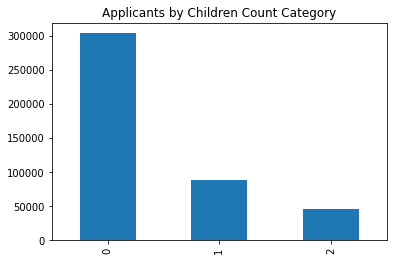

In [19]:
pie = credit_application_df['ChildrenCountCategory'].value_counts()
ax = pie.plot(kind='bar')

ax.set_ylabel("")
plt.title("Applicants by Children Count Category")

plt.savefig("Images/ChildrenCountCategoryBefore.png")
plt.show()

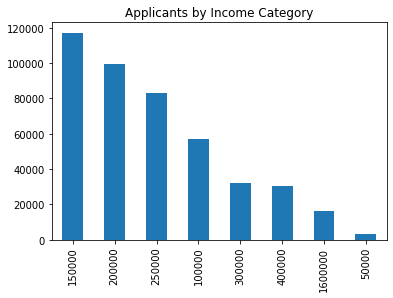

In [20]:
pie = credit_application_df['IncomeCategory'].value_counts()
ax = pie.plot(kind='bar')

ax.set_ylabel("")
plt.title("Applicants by Income Category")

plt.savefig("Images/IncomeCategoryBefore.png")
plt.show()

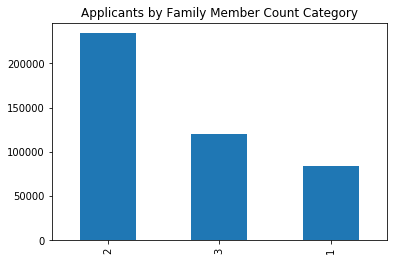

In [21]:
pie = credit_application_df['FamilyMemberCountCategory'].value_counts()
ax = pie.plot(kind='bar')

ax.set_ylabel("")
plt.title("Applicants by Family Member Count Category")

plt.savefig("Images/FamilyMemberCountCategoryBefore.png")
plt.show()

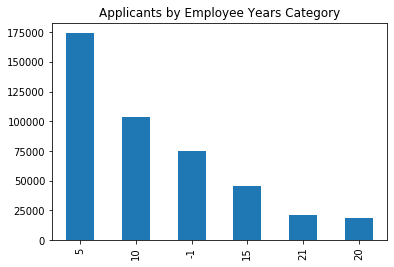

In [22]:
pie = credit_application_df['EmployeeYearsCategory'].value_counts()
ax = pie.plot(kind='bar')

ax.set_ylabel("")
plt.title("Applicants by Employee Years Category")

plt.savefig("Images/EmployeeYearsCategoryBefore.png")
plt.show()

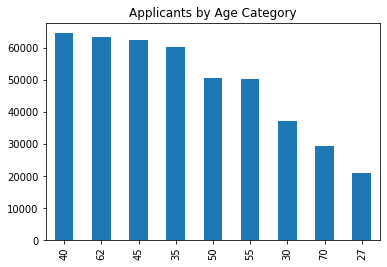

In [23]:
pie = credit_application_df['AgeCategory'].value_counts()
ax = pie.plot(kind='bar')

ax.set_ylabel("")
plt.title("Applicants by Age Category")

plt.savefig("Images/AgeCategoryBefore.png")
plt.show()

In [24]:
#In the end, I belive the customer should be labeled "good" or "bad" 
#according to the amount of times that customer exceed the 59 days over 
#due limit or has bad debts (status 2 till 5). 

# 0: 1-29 days past due 
# 1: 30-59 days past due 
# 2: 60-89 days overdue 
# 3: 90-119 days overdue 
# 4: 120-149 days overdue 
# 5: Overdue or bad debts, write-offs for more than 150 days 
# C: paid off that month 
# X: No loan for the month

conditions = [
                (credit_df['STATUS'] == 'X'),
                (credit_df['STATUS'] == 'C'),
                (credit_df['STATUS'] == '0'),
                (credit_df['STATUS'] >= "1")
            ]
choices = ['Good','Good','Good','Bad']
credit_df['Label'] = np.select(conditions, choices)

credit_df.head()

,ID,MONTHS_BALANCE,STATUS,Label
0,5001711,0,X,Good
1,5001711,-1,0,Good
2,5001711,-2,0,Good
3,5001711,-3,0,Good
4,5001712,0,C,Good


In [25]:
grouped_credit_df = credit_df.groupby(['ID', 'Label'])

credit_label_count_df = grouped_credit_df.count()

credit_label_df = credit_label_count_df.reset_index()
credit_label_df.head(10)

,ID,Label,MONTHS_BALANCE,STATUS
0,5001711,Good,4,4
1,5001712,Good,19,19
2,5001713,Good,22,22
3,5001714,Good,15,15
4,5001715,Good,60,60
5,5001717,Good,22,22
6,5001718,Bad,2,2
7,5001718,Good,37,37
8,5001719,Good,43,43
9,5001720,Bad,7,7


In [26]:
credit_good_df = credit_label_df.loc[credit_label_df["Label"] == 'Good']
credit_bad_df = credit_label_df.loc[credit_label_df["Label"] == 'Bad']

In [27]:
credit_merge_df = credit_good_df.merge(credit_bad_df,how='outer',on= 'ID')
credit_merge_df.head(10)

,ID,Label_x,MONTHS_BALANCE_x,STATUS_x,Label_y,MONTHS_BALANCE_y,STATUS_y
0,5001711,Good,4.0,4.0,NaN,NaN,NaN
1,5001712,Good,19.0,19.0,NaN,NaN,NaN
2,5001713,Good,22.0,22.0,NaN,NaN,NaN
3,5001714,Good,15.0,15.0,NaN,NaN,NaN
4,5001715,Good,60.0,60.0,NaN,NaN,NaN
5,5001717,Good,22.0,22.0,NaN,NaN,NaN
6,5001718,Good,37.0,37.0,Bad,2.0,2.0
7,5001719,Good,43.0,43.0,NaN,NaN,NaN
8,5001720,Good,29.0,29.0,Bad,7.0,7.0
9,5001723,Good,31.0,31.0,NaN,NaN,NaN


In [28]:
# Bad applicants
credit_all_df1 = credit_merge_df.loc[credit_merge_df['STATUS_y'] >= 1]

# Good applicants
credit_all_df2 = credit_merge_df.loc[credit_merge_df['Label_y'].isnull()]

# Bad applicants
credit_all_df3 = credit_merge_df.loc[credit_merge_df['Label_x'].isnull()]

# Good applicants
credit_all_df4 = credit_merge_df.loc[(credit_merge_df['STATUS_x'] >= 0.0) &
                                     (credit_merge_df['STATUS_y'] < 1)]

credit_all_df1 = credit_all_df1.rename(columns={'Label_y':'Label'})
credit_all_df1 = credit_all_df1[['ID','Label']]

credit_all_df2 = credit_all_df2.rename(columns={'Label_x':'Label'})
credit_all_df2 = credit_all_df2[['ID','Label']]

credit_all_df3 = credit_all_df3.rename(columns={'Label_y':'Label'})
credit_all_df3 = credit_all_df3[['ID','Label']]

credit_all_df4 = credit_all_df4.rename(columns={'Label_x':'Label'})
credit_all_df4 = credit_all_df4[['ID','Label']]

credit_all_df = pd.concat([credit_all_df1,credit_all_df2,credit_all_df3,credit_all_df4])   
credit_all_df.head(10)

,ID,Label
6,5001718,Bad
8,5001720,Bad
35,5001757,Bad
57,5001786,Bad
63,5001792,Bad
64,5001793,Bad
78,5001816,Bad
79,5001817,Bad
94,5001836,Bad
102,5001844,Bad


In [29]:
credit_application_all_df = credit_application_df.merge(credit_all_df,how='inner',on='ID')

credit_application_all_df = credit_application_all_df[["Gender", "OwnsCar", "OwnsRealty", "EducationType","FamilyStatus",
                                        "HousingType","Email","IncomeType",
                                        "ChildrenCountCategory","IncomeCategory","FamilyMemberCountCategory",
                                        "EmployeeYearsCategory","AgeCategory","Label"]]

credit_application_all_df = credit_application_all_df.drop_duplicates()
credit_application_all_df.head()

,Gender,OwnsCar,OwnsRealty,EducationType,FamilyStatus,HousingType,Email,IncomeType,ChildrenCountCategory,IncomeCategory,FamilyMemberCountCategory,EmployeeYearsCategory,AgeCategory,Label
0,0,1,1,0,0,0,0,0,0,1600000,2,15,35,Bad
2,0,1,1,1,1,1,0,0,0,150000,2,5,62,Good
3,1,0,1,1,2,1,1,1,0,300000,1,10,55,Good
7,1,0,1,0,3,1,0,2,0,300000,1,-1,62,Good
10,0,1,1,0,1,1,1,0,0,300000,2,5,50,Good


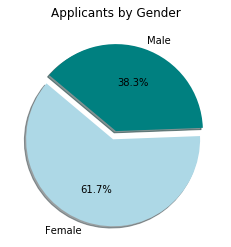

In [30]:
colors = ['lightblue','teal']
explode = (0.1,0)
labels = ['Female','Male']

pie = credit_application_all_df['Gender'].value_counts()
ax = pie.plot(kind='pie',autopct="%1.1f%%", shadow=True, startangle=140,explode=explode,colors=colors,
             labels=labels)

ax.set_ylabel("")
plt.title("Applicants by Gender")

plt.savefig("Images/GenderAfter.png")
plt.show()

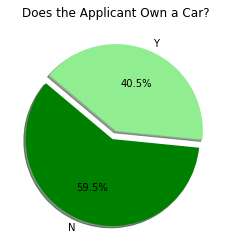

In [31]:
colors = ['green','lightgreen']
explode = (0.1,0)
labels = ['N','Y']

pie = credit_application_all_df['OwnsCar'].value_counts()
ax = pie.plot(kind='pie',autopct="%1.1f%%", shadow=True, startangle=140,explode=explode,colors=colors,labels=labels)

ax.set_ylabel("")
plt.title("Does the Applicant Own a Car?")

plt.savefig("Images/CarAfter.png")
plt.show()

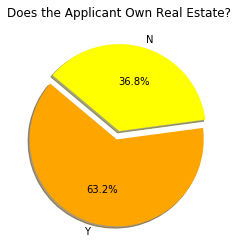

In [32]:
colors = ['orange','yellow']
explode = (0.1,0)
labels = ['Y','N']

pie = credit_application_all_df['OwnsRealty'].value_counts()
ax = pie.plot(kind='pie',autopct="%1.1f%%", shadow=True, startangle=140,explode=explode,colors=colors,labels=labels)

ax.set_ylabel("")
plt.title("Does the Applicant Own Real Estate?")

plt.savefig("Images/RealtyAfter.png")
plt.show()

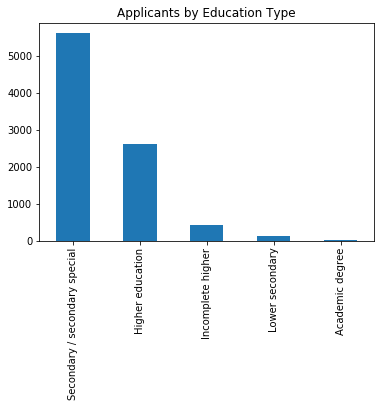

In [33]:
pie = credit_application_all_df['EducationType'].value_counts()
xticks = ['Secondary / secondary special','Higher education','Incomplete higher','Lower secondary','Academic degree']
x_axis = np.arange(len(pie))

ax = pie.plot(kind='bar')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, xticks)

plt.title("Applicants by Education Type")

plt.savefig("Images/EducationTypeAfter.png")
plt.show()

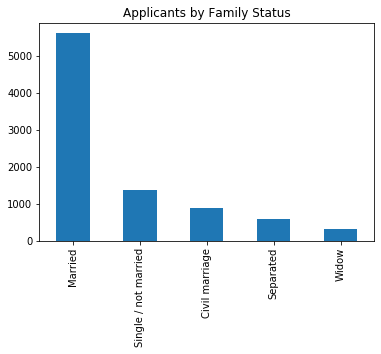

In [34]:
pie = credit_application_all_df['FamilyStatus'].value_counts()
xticks = ['Married','Single / not married','Civil marriage','Separated','Widow']
x_axis = np.arange(len(pie))

ax = pie.plot(kind='bar')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, xticks)

plt.title("Applicants by Family Status")

plt.savefig("Images/FamilyStatusAfter.png")
plt.show()

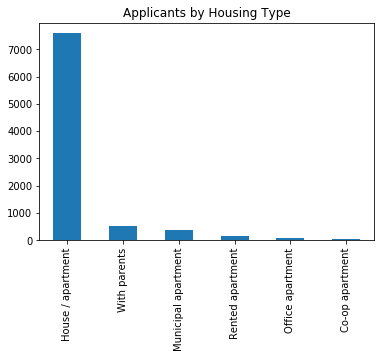

In [35]:
pie = credit_application_all_df['HousingType'].value_counts()
xticks = ['House / apartment','With parents','Municipal apartment','Rented apartment','Office apartment',
         'Co-op apartment']
x_axis = np.arange(len(pie))

ax = pie.plot(kind='bar')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, xticks)

plt.title("Applicants by Housing Type")

plt.savefig("Images/HousingTypeAfter.png")
plt.show()

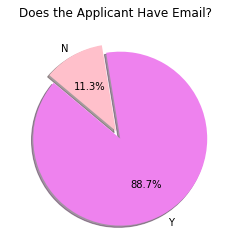

In [36]:
colors = ['violet','pink']
explode = (0.1,0)
labels = ['Y','N']

pie = credit_application_all_df['Email'].value_counts()
ax = pie.plot(kind='pie',autopct="%1.1f%%", shadow=True, startangle=140,explode=explode,colors=colors, labels=labels)

ax.set_ylabel("")
plt.title("Does the Applicant Have Email?")

plt.savefig("Images/EmailAfter.png")
plt.show()

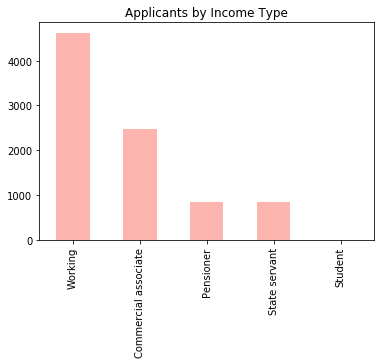

In [37]:
pie = credit_application_all_df['IncomeType'].value_counts()
xticks = ['Working','Commercial associate','Pensioner','State servant','Student']
x_axis = np.arange(len(pie))

ax = pie.plot(kind='bar', colormap='Pastel1')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, xticks)

plt.title("Applicants by Income Type")

plt.savefig("Images/IncomeTypeAfter.png")
plt.show()

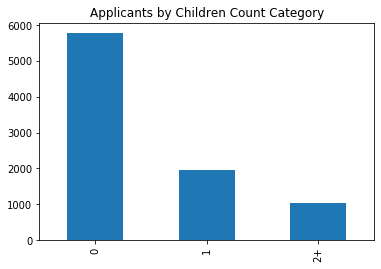

In [38]:
pie = credit_application_all_df['ChildrenCountCategory'].value_counts()
xticks = ['0','1','2+']
x_axis = np.arange(len(pie))

ax = pie.plot(kind='bar')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, xticks)

plt.title("Applicants by Children Count Category")

plt.savefig("Images/ChildrenCountCategoryAfter.png")
plt.show()

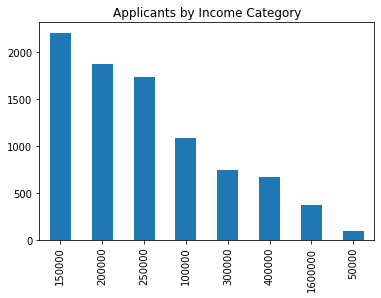

In [39]:
pie = credit_application_all_df['IncomeCategory'].value_counts()

ax = pie.plot(kind='bar')

plt.title("Applicants by Income Category")

plt.savefig("Images/IncomeCategoryAfter.png")
plt.show()

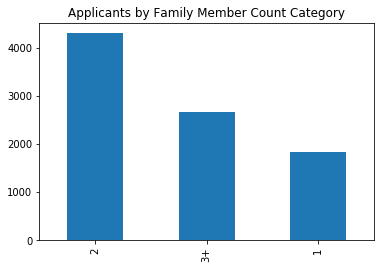

In [40]:
pie = credit_application_all_df['FamilyMemberCountCategory'].value_counts()
xticks = ['2','3+','1']
x_axis = np.arange(len(pie))

ax = pie.plot(kind='bar')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, xticks)

plt.title("Applicants by Family Member Count Category")

plt.savefig("Images/FamilyMemberCountCategoryAfter.png")
plt.show()

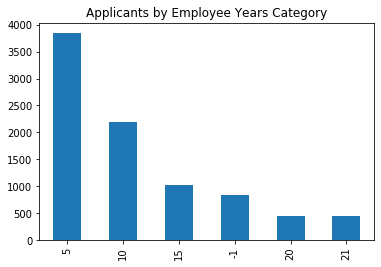

In [41]:
pie = credit_application_all_df['EmployeeYearsCategory'].value_counts()
x_axis = np.arange(len(pie))

ax = pie.plot(kind='bar')

plt.title("Applicants by Employee Years Category")

plt.savefig("Images/EmployeeYearsCategoryAfter.png")
plt.show()

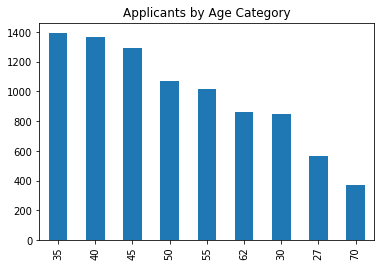

In [42]:
pie = credit_application_all_df['AgeCategory'].value_counts()

ax = pie.plot(kind='bar')

plt.title("Applicants by Age Category")

plt.savefig("Images/AgeCategoryAfter.png")
plt.show()

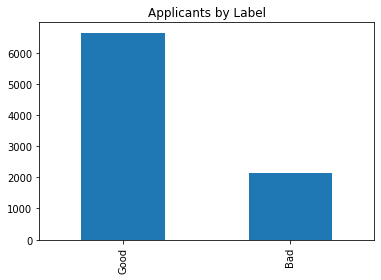

In [43]:
pie = credit_application_all_df['Label'].value_counts()

ax = pie.plot(kind='bar')

plt.title("Applicants by Label")

plt.savefig("Images/LabelAfter.png")
plt.show()

In [44]:
credit_application_all_df.head()

,Gender,OwnsCar,OwnsRealty,EducationType,FamilyStatus,HousingType,Email,IncomeType,ChildrenCountCategory,IncomeCategory,FamilyMemberCountCategory,EmployeeYearsCategory,AgeCategory,Label
0,0,1,1,0,0,0,0,0,0,1600000,2,15,35,Bad
2,0,1,1,1,1,1,0,0,0,150000,2,5,62,Good
3,1,0,1,1,2,1,1,1,0,300000,1,10,55,Good
7,1,0,1,0,3,1,0,2,0,300000,1,-1,62,Good
10,0,1,1,0,1,1,1,0,0,300000,2,5,50,Good


### Model Prediction No. 1 - Logistic Regression
#### Using all variables

In [45]:
X = credit_application_all_df[["Gender", "OwnsCar", "OwnsRealty", "EducationType","FamilyStatus",
                                        "HousingType","Email","IncomeType",
                                        "ChildrenCountCategory","IncomeCategory","FamilyMemberCountCategory",
                                        "EmployeeYearsCategory","AgeCategory"]]
y = credit_application_all_df['Label']

print(X.shape, y.shape)

(8782, 13) (8782,)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [47]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
from sklearn.metrics import accuracy_score

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7585788035226237
Testing Data Score: 0.7490892531876139


In [50]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good']
First 10 Actual labels: ['Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Good', 'Good']


In [51]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True).head()

,Prediction,Actual
0,Good,Good
1,Good,Good
2,Good,Bad
3,Good,Bad
4,Good,Good


In [52]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).nunique()

Prediction    1
Actual        2
dtype: int64

#### The model predicted everyone as a good candidate. This model was deemed not a good model for this type of data.

### Model Prediction No. 2 - KNN
#### Using all variables

In [53]:
X = credit_application_all_df[["Gender", "OwnsCar", "OwnsRealty", "EducationType","FamilyStatus",
                                        "HousingType","Email","IncomeType",
                                        "ChildrenCountCategory","IncomeCategory","FamilyMemberCountCategory",
                                        "EmployeeYearsCategory","AgeCategory"]]
y = credit_application_all_df['Label']

print(X.shape, y.shape)

(8782, 13) (8782,)


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [55]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [56]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
       
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")

plt.savefig("Images/KNNChart1.png")
plt.show()

k: 1, Train/Test Score: 0.861/0.509
k: 3, Train/Test Score: 0.788/0.638
k: 5, Train/Test Score: 0.770/0.689
k: 7, Train/Test Score: 0.765/0.709
k: 9, Train/Test Score: 0.763/0.718


In [ ]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

In [ ]:
temp = knn.predict(X_test_scaled)
np.unique(temp, return_counts=True)

In [ ]:
predictions = knn.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [ ]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True).head()